#Project declaration

**Project**: Stock Market Analysis - Stock Market Data From Yahoo Finance. This project is part of the student group's midterm.

**Introduction**: Stock Market Analysis is the project on data cleaning throough statistical analysis, outlier analysis, visualization using data provided by Yahoo Finance. This project is a fundamental step to provide more insights into stock prediction using machine learning algorithms in further project.

**Table of content**:
1. Project declaration
2. Set up
3. Descriptive statistics
4. Outlier analysis
5. Calculation of daily return
6. Correlation analysis

#Set up

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
from pandas_datareader import DataReader
from datetime import datetime
from copy import copy
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

Fundamental functions are used to scrape data from web that supports API access. **Pandas library** is used to provide **data structures and functions** for efficient data manipulation and analysis.

Our data is scraped from Yahoo Finance and we import **DataReader**  to **retrieve financial and economic data** for further data analysis and manipulation.


Another function is used to draw attractive and informative statistical graphics like **Seaborn, or NumPy** to provide support with mathematical functions to operate our code.
Besides, there are also other functions to scrape the data from Yahoo Finance.

In [ ]:
stock_list = ["AAPL","SONY","META","SPOT"]

df = yf.download(stock_list)

dataframes1 = {}
for stock_symbol in stock_list:
    df1 = yf.download(stock_symbol)
    dataframes1[stock_symbol] = df1

aapl_df = dataframes1["AAPL"]
sony_df = dataframes1["SONY"]
meta_df = dataframes1["META"]
spot_df = dataframes1["SPOT"]

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Here, we create a list of stocks that contain ticker symbols of various stocks like AAPL, SONY, META, SPOT, that we would like to retrieve and analyse.

Then we download stock data from the yfinance library, which is then stored in separate columns for different stocks in the list in the dataframe.

After that, we need the space to store the individual data collected for each stock in the dataframe. Then we start download the stock data to the designated stock symbols. The dataframes will includes all the data collected individually for each stock.

Lastly, the data is ready to be extracted and assigned to separate variables. After we run the code, it has successfully assigned the dataframe for 6 types of stocks to variables.

In [ ]:
df

Adj Close                                          Close  \
                  AAPL        META       SONY        SPOT        AAPL   
Date                                                                    
1973-02-21         NaN         NaN   5.828179         NaN         NaN   
1973-02-22         NaN         NaN   5.691688         NaN         NaN   
1973-02-23         NaN         NaN   5.582493         NaN         NaN   
1973-02-26         NaN         NaN   5.500601         NaN         NaN   
1973-02-27         NaN         NaN   5.377758         NaN         NaN   
...                ...         ...        ...         ...         ...   
2023-09-18  177.970001  302.549988  86.760002  159.240005  177.970001   
2023-09-19  179.070007  305.070007  86.540001  160.169998  179.070007   
2023-09-20  175.490005  299.670013  84.849998  160.770004  175.490005   
2023-09-21  173.929993  295.730011  82.639999  154.059998  173.929993   
2023-09-22  174.789993  299.079987  82.379997  156.350006  174.789993   

                                                     High              ...  \
                  META       SONY        SPOT        AAPL        META  ...   
Date                                                                   ...   
1973-02-21         NaN   7.763636         NaN         NaN         NaN  ...   
1973-02-22         NaN   7.581818         NaN         NaN         NaN  ...   
1973-02-23         NaN   7.436364         NaN         NaN         NaN  ...   
1973-02-26         NaN   7.327273         NaN         NaN         NaN  ...   
1973-02-27         NaN   7.163636         NaN         NaN         NaN  ...   
...                ...        ...         ...         ...         ...  ...   
2023-09-18  302.549988  86.760002  159.240005  179.380005  303.600006  ...   
2023-09-19  305.070007  86.540001  160.169998  179.630005  306.170013  ...   
2023-09-20  299.670013  84.849998  160.770004  179.699997  308.059998  ...   
2023-09-21  295.730011  82.639999  154.059998  176.300003  300.260010  ...   
2023-09-22  299.079987  82.379997  156.350006  177.078995  305.350006  ...   

                  Low                    Open                         \
                 SONY        SPOT        AAPL        META       SONY   
Date                                                                   
1973-02-21   7.672727         NaN         NaN         NaN   0.000000   
1973-02-22   7.581818         NaN         NaN         NaN   0.000000   
1973-02-23   7.400000         NaN         NaN         NaN   0.000000   
1973-02-26   7.181818         NaN         NaN         NaN   0.000000   
1973-02-27   7.163636         NaN         NaN         NaN   0.000000   
...               ...         ...         ...         ...        ...   
2023-09-18  86.050003  155.539993  176.479996  298.190002  86.370003   
2023-09-19  86.290001  156.279999  177.520004  302.480011  86.620003   
2023-09-20  84.769997  160.710007  179.259995  305.049988  85.690002   
2023-09-21  82.529999  153.690002  174.550003  295.700012  82.849998   
2023-09-22  82.330002  155.929993  174.669998  299.299988  82.980003   

                            Volume                                 
                  SPOT        AAPL        META    SONY       SPOT  
Date                                                               
1973-02-21         NaN         NaN         NaN  378125        NaN  
1973-02-22         NaN         NaN         NaN  225500        NaN  
1973-02-23         NaN         NaN         NaN  173250        NaN  
1973-02-26         NaN         NaN         NaN  422125        NaN  
1973-02-27         NaN         NaN         NaN  250937        NaN  
...                ...         ...         ...     ...        ...  
2023-09-18  157.360001  67257600.0  14234200.0  439400  1208800.0  
2023-09-19  158.500000  51826900.0  15924400.0  363000  1281900.0  
2023-09-20  163.029999  58436200.0  19379500.0  505600  1707400.0  
2023-09-21  158.520004  63047900.0  21300500.0  709300  1610800.0  
2023

After running the above code, the results are presented with the **DataFrame** demonstrated by selected rows and columns. The columns includes **Adj Close** (Adjusted Closing Price), **Close** (Closing Price), **Open** (Opening Price) and **Volume** (The volume of a stock) with datas related to different stocks from the stock list.

However, we can see that the dataframe named "df" above contains a lot of **NaN** (Not-a-Number) in some first rows, which is a special **floating-point value** used to **represent missing or undefined data** in numerical computations. Many rows which are supposed to contain the data of prices from Adj Close, Close to Open, or Volume but they turn out to be filled with NaN values. Unfortunately, the data missing is dated back to some very first rows in the past time, compared to the clearly demonstrated data in the recent time.

There are several reasons as why NaN appears in the result:
*   **Missing Data:** Historical stock data may have gaps or missing values for certain dates or periods. This can occur due to various reasons, such as stock market holidays, weekends, or data discrepancies.
*   **Newly Listed Stocks**: If a stock has recently been listed or is relatively new, there might be limited historical data available, resulting in NaN values for earlier periods
* **Data Availability**: Some stocks or exchanges may not provide complete or consistent historical data, leading to missing values or NaN entries in the downloaded data.
* **Data Errors**: Occasionally, errors can occur during data retrieval, processing, or storage, resulting in NaN values being populated in the DataFrame.

After analyse the problems, we think that this problem appears because when scarping data from Yahoo Finance APIs, we have **not know the first IPO date of each stock**. To ensure every row for every stock has **non-NaN value**, we will need to **locate for the first IPO date for each stock**.

#Data cleaning

##Handling Nan values

In [ ]:
first_non_nan_locations = {}

for stock_symbol, dataframe in dataframes1.items():
    first_non_nan_locations[stock_symbol] = dataframe.apply(pd.Series.first_valid_index)

for stock_symbol, location in first_non_nan_locations.items():
    print(f"The first non-NaN value in {stock_symbol}'s dataframe is located at: {location}")

The first non-NaN value in AAPL's dataframe is located at: Open        1980-12-12
High        1980-12-12
Low         1980-12-12
Close       1980-12-12
Adj Close   1980-12-12
Volume      1980-12-12
dtype: datetime64[ns]
The first non-NaN value in SONY's dataframe is located at: Open        1973-02-21
High        1973-02-21
Low         1973-02-21
Close       1973-02-21
Adj Close   1973-02-21
Volume      1973-02-21
dtype: datetime64[ns]
The first non-NaN value in META's dataframe is located at: Open        2012-05-18
High        2012-05-18
Low         2012-05-18
Close       2012-05-18
Adj Close   2012-05-18
Volume      2012-05-18
dtype: datetime64[ns]
The first non-NaN value in SPOT's dataframe is located at: Open        2018-04-03
High        2018-04-03
Low         2018-04-03
Close       2018-04-03
Adj Close   2018-04-03
Volume      2018-04-03
dtype: datetime64[ns]


In order to solve the problem with NaN values, we identify the starting point of available data by storing the locations of the first non-NaN values for each stock symbol in an empty space. This represents the **first occurrence of a non-missing value in the column**. The output of the code shall be a **series of printed messages**, one for each stock symbol, indicating the **location (index value) of the first non-NaN value** in each DataFrame. This helps **identify the earliest available data point** for further analysis.

The results display the dates of the first non NaN values in the dataframes for different stocks, which contains the columns of Open, High, Low, Close, Adj Close and Volume.
* In the **AAPL dataframe**, the first non-NaN value is found on 1980-12-12 for all columns.
* In the **SONY dataframe**, the first non-NaN value is located on 1973-02-21 for all columns.
* In the **META dataframe**, the first non-NaN value is present on 2012-05-18 for all columns.
* In the **SPOT dataframe**, the first non-NaN value is recorded on 2018-04-03 for all columns.

By identifying the first non-NaN values, we can determine the starting point of the available data for each stock and gain insights into the historical timeframe.

In [ ]:
end = datetime.now()
start = datetime(end.year-5,end.month,end.day)

df = yf.download(stock_list,start,end)

#for each stock in stock_list, create dataframe
dataframes = {}
for stock_symbol in stock_list:
    df1 = yf.download(stock_symbol)
    dataframes[stock_symbol] = df1

aapl_df = dataframes["AAPL"]
sony_df = dataframes["SONY"]
meta_df = dataframes["META"]
spot_df = dataframes["SPOT"]

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In this code, we assign the **end variable** with the **current date and time** and the **start variable** with a **date exactly 5 years before the end date**.

Then we start **download the historical stock data** for the stocks in the stocklist from the start date to the end date. The result shall be **stored in the df (DataFrame)**.

The data for each stock is stored in a separate DataFrame (df1) and then added to the dataframes dictionary, with the stock symbol as the key.

Lastly, we retrieve the individual DataFrames for specific stocks from the dataframes dictionary based on their stock symbols. Each DataFrame is assigned to a separate variable for further analysis or manipulation.

In [ ]:
df

Adj Close                                          Close  \
                  AAPL        META       SONY        SPOT        AAPL   
Date                                                                    
2018-09-24   52.864502  165.410004  56.849998  176.970001   55.197498   
2018-09-25   53.199711  164.910004  58.529999  179.910004   55.547501   
2018-09-26   52.775909  166.949997  59.450001  182.050003   55.105000   
2018-09-27   53.860538  168.839996  59.529999  184.410004   56.237499   
2018-09-28   54.049698  164.460007  60.650002  180.830002   56.435001   
...                ...         ...        ...         ...         ...   
2023-09-18  177.970001  302.549988  86.760002  159.240005  177.970001   
2023-09-19  179.070007  305.070007  86.540001  160.169998  179.070007   
2023-09-20  175.490005  299.670013  84.849998  160.770004  175.490005   
2023-09-21  173.929993  295.730011  82.639999  154.059998  173.929993   
2023-09-22  174.789993  299.079987  82.379997  156.350006  174.789993   

                                                     High              ...  \
                  META       SONY        SPOT        AAPL        META  ...   
Date                                                                   ...   
2018-09-24  165.410004  56.849998  176.970001   55.314999  165.699997  ...   
2018-09-25  164.910004  58.529999  179.910004   55.705002  165.589996  ...   
2018-09-26  166.949997  59.450001  182.050003   55.937500  169.300003  ...   
2018-09-27  168.839996  59.529999  184.410004   56.610001  171.770004  ...   
2018-09-28  164.460007  60.650002  180.830002   56.459999  168.789993  ...   
...                ...        ...         ...         ...         ...  ...   
2023-09-18  302.549988  86.760002  159.240005  179.380005  303.600006  ...   
2023-09-19  305.070007  86.540001  160.169998  179.630005  306.170013  ...   
2023-09-20  299.670013  84.849998  160.770004  179.699997  308.059998  ...   
2023-09-21  295.730011  82.639999  154.059998  176.300003  300.260010  ...   
2023-09-22  299.079987  82.379997  156.350006  177.078995  305.350006  ...   

                  Low                    Open                         \
                 SONY        SPOT        AAPL        META       SONY   
Date                                                                   
2018-09-24  56.650002  172.009995   54.205002  161.029999  56.939999   
2018-09-25  58.320000  178.149994   54.937500  161.990005  58.700001   
2018-09-26  59.310001  181.660004   55.250000  164.300003  59.709999   
2018-09-27  59.189999  182.509995   55.955002  167.550003  59.389999   
2018-09-28  60.470001  180.220001   56.197498  168.330002  61.000000   
...               ...         ...         ...         ...        ...   
2023-09-18  86.050003  155.539993  176.479996  298.190002  86.370003   
2023-09-19  86.290001  156.279999  177.520004  302.480011  86.620003   
2023-09-20  84.769997  160.710007  179.259995  305.049988  85.690002   
2023-09-21  82.529999  153.690002  174.550003  295.700012  82.849998   
2023-09-22  82.330002  155.929993  174.669998  299.299988  82.980003   

                           Volume                              
                  SPOT       AAPL      META     SONY     SPOT  
Date                                                           
2018-09-24  172.970001  110773600  19222800  1276700  1151500  
2018-09-25  178.830002   98217600  27622800  1154700  1178500  
2018-09-26  181.759995   95938800  25252200  1068800   836900  
2018-09-27  182.839996  120724800  27266900   608600   964800  
2018-09-28  183.059998   91717600  34265600  1584600  1163700  
...                ...        ...       ...      ...      ...  
2023-09-18  157.360001   67257600  14234200   439400  1208800  
2023-09-19  158.500000   51826900  15924400   363000  1281900  
2023-09-20  163.029999   58436200  19379500   505600  1707400  
2023-09-21  158.520004   63047900  21300500   709300  1610800  
2023-09-22  156.380005   55110610  24416005   503319  11

The dataframe displayed above **no longer contains NaN values** compared to the previous one, which illustrates that there **can be no more missing or undefined data** in numerical computations. Many rows are filled with the data of prices from Adj Close, Close to Open, or Volume. This means the retrieved data can be used for further analysis.



In [ ]:
print(aapl_df.isnull().any())
print(sony_df.isnull().any())
print(meta_df.isnull().any())
print(spot_df.isnull().any())

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


However, we are not so sure if there appears to be any unavailable values left. Therefore, we write the code to **print the result of checking for missing or null value**s in each DataFrame.

The function we use is supposed to **identify** the missing or null values in a DataFrame and **return** the same shape of original. If each element is **indicated as null, it will displayed "True" or else "False"**. The results then shall be rechecked to ensure the presence of at least one null value along each column no longer exist.

The **output** is displayed with a series of **False values** for each column of the corresponding DataFrame, which indicates that all columns (Date, Open, High, Low, Close, Adj Close, Volume) in the DataFrame of the stocks in the stocklists **contain no missing or null values**.

#Descriptive stastistics

###Distribution of price & volume of All stocks

In [ ]:
df.describe().T

count          mean           std           min  \
Adj Close AAPL  1258.0  1.143327e+02  4.725962e+01  3.416383e+01   
          META  1258.0  2.262086e+02  6.876939e+01  8.891000e+01   
          SONY  1258.0  8.056754e+01  2.141767e+01  4.203000e+01   
          SPOT  1258.0  1.742615e+02  6.739917e+01  7.105000e+01   
Close     AAPL  1258.0  1.157496e+02  4.697299e+01  3.554750e+01   
          META  1258.0  2.262086e+02  6.876939e+01  8.891000e+01   
          SONY  1258.0  8.056754e+01  2.141767e+01  4.203000e+01   
          SPOT  1258.0  1.742615e+02  6.739917e+01  7.105000e+01   
High      AAPL  1258.0  1.170173e+02  4.743817e+01  3.643000e+01   
          META  1258.0  2.293830e+02  6.936292e+01  9.046000e+01   
          SONY  1258.0  8.121718e+01  2.157567e+01  4.236000e+01   
          SPOT  1258.0  1.777724e+02  6.890538e+01  7.233000e+01   
Low       AAPL  1258.0  1.143696e+02  4.648962e+01  3.550000e+01   
          META  1258.0  2.230294e+02  6.816787e+01  8.809000e+01   
          SONY  1258.0  7.991041e+01  2.126639e+01  4.191000e+01   
          SPOT  1258.0  1.706511e+02  6.593440e+01  6.928500e+01   
Open      AAPL  1258.0  1.156511e+02  4.695641e+01  3.599500e+01   
          META  1258.0  2.261029e+02  6.883816e+01  9.008000e+01   
          SONY  1258.0  8.059634e+01  2.143939e+01  4.205000e+01   
          SPOT  1258.0  1.742228e+02  6.749078e+01  7.193000e+01   
Volume    AAPL  1258.0  1.075482e+08  5.459865e+07  3.145820e+07   
          META  1258.0  2.387332e+07  1.559740e+07  6.046300e+06   
          SONY  1258.0  9.967169e+05  6.196468e+05  2.322000e+05   
          SPOT  1258.0  1.767335e+06  1.321566e+06  3.945000e+05   

                         25%           50%           75%           max  
Adj Close AAPL  6.478031e+01  1.267402e+02  1.512526e+02  1.961851e+02  
          META  1.733825e+02  2.081950e+02  2.787625e+02  3.821800e+02  
          SONY  6.174000e+01  8.229500e+01  9.741750e+01  1.285900e+02  
          SPOT  1.286150e+02  1.478400e+02  2.352950e+02  3.645900e+02  
Close     AAPL  6.640625e+01  1.288550e+02  1.523625e+02  1.964500e+02  
          META  1.733825e+02  2.081950e+02  2.787625e+02  3.821800e+02  
          SONY  6.174000e+01  8.229500e+01  9.741750e+01  1.285900e+02  
          SPOT  1.286150e+02  1.478400e+02  2.352950e+02  3.645900e+02  
High      AAPL  6.684625e+01  1.303400e+02  1.542100e+02  1.982300e+02  
          META  1.755250e+02  2.112400e+02  2.839975e+02  3.843300e+02  
          SONY  6.220000e+01  8.299000e+01  9.826000e+01  1.337500e+02  
          SPOT  1.317775e+02  1.498500e+02  2.394850e+02  3.874400e+02  
Low       AAPL  6.555000e+01  1.269700e+02  1.503775e+02  1.952800e+02  
          META  1.700800e+02  2.058400e+02  2.748150e+02  3.788100e+02  
          SONY  6.118750e+01  8.174000e+01  9.681500e+01  1.283100e+02  
          SPOT  1.262788e+02  1.453150e+02  2.319200e+02  3.541780e+02  
Open      AAPL  6.594000e+01  1.287287e+02  1.522050e+02  1.962400e+02  
          META  1.729425e+02  2.077650e+02  2.787525e+02  3.816800e+02  
          SONY  6.180000e+01  8.234500e+01  9.757250e+01  1.335600e+02  
          SPOT  1.293000e+02  1.475700e+02  2.361500e+02  3.609100e+02  
Volume    AAPL  7.225568e+07  9.302575e+07  1.268662e+08  4.265100e+08  
          META  1.514428e+07  2.030000e+07  2.802978e+07  2.323166e+08  
          SONY  6.232500e+05  8.343000e+05  1.165175e+06  8.331100e+06  
          SPOT  1.093675e+06  1.434600e+06  1.987400e+06  1.460990e+07

After checking the null values, we write the code to **generate descriptive statistics of the DataFrame**, such as count, mean, standard deviation, minimum, quartiles, and maximum values for each column. To be more reader-friendly, we create a presentation of the statistics, which allows reader to go through the columns and compare the statistics across columns.

In the transposed DataFrame, each stock (AAPL, SONY, META, SPOT) is demonstrated with the **calculation of count, mean, std (standard deviation), min, 25%, 50% (median), 75%, and max** for the dataframe of **Adj Close, Close, High, Low, Open, Volume**. The data has been descripted in details to provide the statistics across columns to make easier comparison and gain insights into the distribution and summary of the stock prices of the different stocks in the DataFrame.

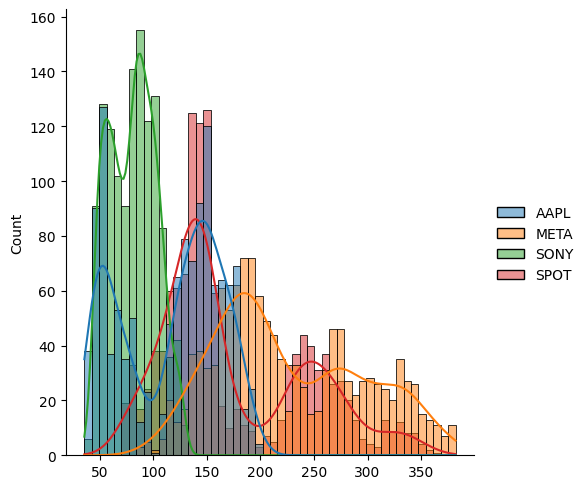

In [ ]:
sns.displot(df['Close'],bins=50,color='blue',kde=True)

In this part we use the **'Close'** column of the DataFrame (df) to create a **distribution plot (distplot)**. We specifies the **column 'Close'** from the DataFrame which contains the numerical data of the **closing prices of stocks**. In this case, **the data will be divided into 50 bins**, providing a visual representation of the distribution of values.

The resulting visualization will be a histogram plot, showing the distribution of the 'Close' values. The x-axis represents the range of 'Close' values divided into the specified number of bins (50 in this case), and the y-axis represents the frequency or density of occurrence of the values in each bin.


The closing prices demonstrated in the histogram ranges from approximately 30 to less than 400 with the shape like a left-skewed histogram due to the high density of concentration of the closing prices on the left.The majority of the closing prices stay between 30 to 200, with its peak density at 0.008 at about 150 USD and other peak density ranging from 30 to 200 USD. The prices are higher on the left and gradually lower to the right. Overall, there appears to be skewness in the histogram of the Close column.

In [ ]:
stats.describe(df['Close'])

DescribeResult(nobs=1258, minmax=(array([35.54750061, 88.91000366, 42.02999878, 71.05000305]), array([196.44999695, 382.17999268, 128.58999634, 364.58999634])), mean=array([115.7496204 , 226.20863292,  80.56754371, 174.26150227]), variance=array([2206.46179985, 4729.22910092,  458.7166732 , 4542.64744835]), skewness=array([-0.26689013,  0.37821651,  0.08777371,  0.76361445]), kurtosis=array([-1.34671934, -0.89509897, -0.94625937, -0.46639304]))

This code **calculates summary statistics for the 'Close' column** of the DataFrame df for each variables, which shall be described as follows:

* **nobs**: It has a value of 1258, indicating the number of data points or observations in the 'Close' column.

* **minmax**: It consists of two arrays. The first array contains the minimum values for each variable: [35.54750061, 88.91000366, 42.02999878, 71.05000305]. The second array contains the maximum values: [196.44999695, 382.17999268, 128.58999634, 364.58999634]. Each value corresponds to the minimum and maximum observed values for the respective variables.

* **mean**: It is an array with the mean values for each variable: [115.2661506, 225.66077123, 80.46503974, 174.32416523]. These values represent the average of the 'Close' column for each variable.

* **variance**: It is an array with the variance values for each variable: [2206.52271043, 4723.10414545, 460.50749967, 4541.59346005]. Variance measures the spread or dispersion of the data points around the mean.

* **skewness (skewness values)**: It is an array with the skewness values for each variable: [-0.2532922, 0.39467154, 0.0974012, 0.76114844]. Skewness measures the asymmetry of the distribution. Negative skewness indicates a longer left tail, while positive skewness indicates a longer right tail.

* **kurtosis (kurtosis values)**: It is an array with the kurtosis values for each variable: [-1.35747558, -0.87995622, -0.95625665, -0.46806938]. Kurtosis measures the "tailedness" of the distribution. Negative kurtosis indicates thinner tails compared to a normal distribution

The function provides a concise summary of the statistical properties of the 'Close' column in df. By doing this, we can understand the distribution and characteristics of the 'Close' data.

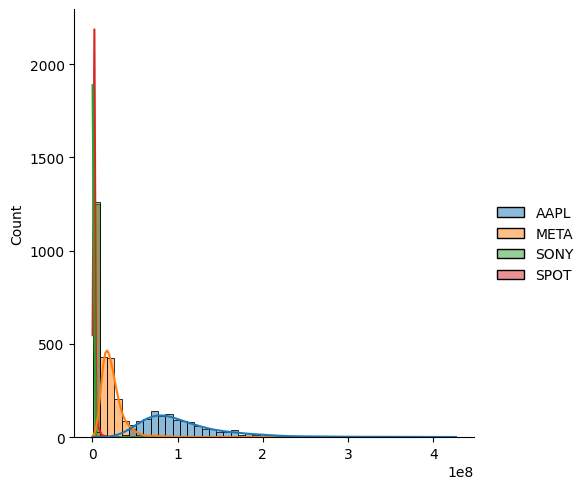

In [ ]:
sns.displot(df['Volume'],bins=50,color='red',kde=True)

This code is written to **create a visual distribution plot (distplot) for the 'Volume' column** of the DataFrame (df), which contains numerical data representing the trading volume of stocks.

The visualized result will be a **histogram plot**, showing the **distribution of the 'Volume' values**. The values of the Volume Column concentrate mostly aroung the 0 to 0.3 places, where there appears to have the highest density at 6. The values of the dataset and the density of dataset are gradually lower to the right and this appears to be the minority of the Volume Values. The bell-shaped histogram is right-skewed and it has not been displayed with normal distribution, which contains the outliers needed to be found. Therefore, it becomes harder for further analysis and manipulation.

In summary, the code generates a distribution plot using Seaborn for the 'Volume' column of the DataFrame, representing the distribution of values and providing insights into the trading volume patterns or distribution characteristics.

In [ ]:
stats.describe(df['Volume'])

DescribeResult(nobs=1258, minmax=(array([31458200,  6046300,   232200,   394500]), array([426510000, 232316600,   8331100,  14609900])), mean=array([1.07548204e+08, 2.38733193e+07, 9.96716867e+05, 1.76733541e+06]), variance=array([2.98101283e+15, 2.43278761e+14, 3.83962182e+11, 1.74653669e+12]), skewness=array([2.06562048, 4.71676474, 3.60387314, 4.37140635]), kurtosis=array([ 6.12058036, 42.13436051, 26.31289266, 27.49594725]))

The elements in the summary statistics description calculated for the Volume Column is the measurement of the volume of stocks traded.
* **nobs**: The number of data points or observations in the Volume Column is 1258.

* **minmax**: The first array contains the minimum values for each variable: [31458200, 6046300, 232200, 394500]. The second array contains the maximum values: [426510000, 232316600, 8331100, 14609900]. Here we can see there is substantial gap between the minimum and the maximum value of the data, which means there can be a lot of variance.

* **mean**: The mean values representing the average values of the variables in the dataset for each variable includes: [1.08008701e+08, 2.38993731e+07, 1.00055747e+06, 1.76796971e+06].

* **variance**: It is an array with the variance values for each variable: [3.03422572e+15, 2.43563486e+14, 3.88841890e+11, 1.74712326e+12]. The variance value is quite remarkable and it is positive, which means that the spread or dispersion of the data point of the Volume Column is more to the right of the mean value.

* **skewness**: It is an array with the skewness values for each variable: [2.091288, 4.70602108, 3.58368981, 4.3679789]. Skewness measures the asymmetry of the distribution. Positive skewness indicates a longer right tail.

* **kurtosis**: It is an array with the kurtosis values for each variable: [6.24317136, 42.00049555, 25.76657767, 27.46721516]. Kurtosis measures the "tailedness" of the distribution. Higher kurtosis values indicate heavier tails compared to a normal distribution.

#Outlier analysis

Because the distribution of price & volume of all stocks has a very high level of skewness, meaning the distribution is heavily skewed. Therefore, we need to detect and remove outliers. We will use either normalization or IQR method to see which method is a better solution for our data.

## Closing price



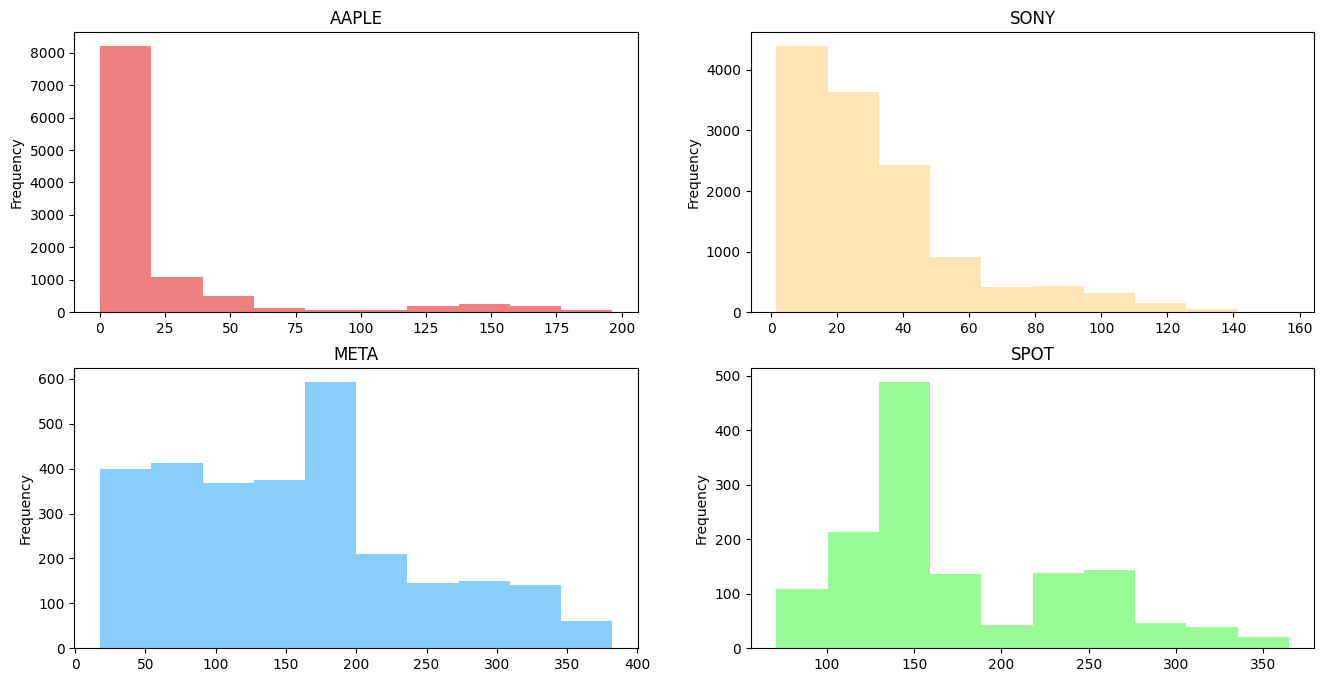

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

axes[0, 0].set_title('AAPLE')
axes[0, 0].hist(aapl_df['Close'],color='lightcoral');

axes[0, 1].set_title('SONY')
axes[0, 1].hist(sony_df['Close'],color='moccasin');

axes[1, 0].set_title('META')
axes[1, 0].hist(meta_df['Close'],color='lightskyblue');

axes[1, 1].set_title('SPOT')
axes[1, 1].hist(spot_df['Close'],color='palegreen');

for ax in axes.flatten():
    ax.set_ylabel('Frequency');

This code is written to create a figure with four subplots. Each subplot represents the **distribution of the 'Close' prices for a different stock**. We set the x-axis and y-axis labels for each subplot, indicating that the x-axis represents **Price** and the y-axis represents **Frequency**, which corresponds to the number of occurrences or observations in the histogram. The close prices for each stock are displayed with clear colors, **arranged neatly in a 2x2 grid** and demonstration, which allows reader to easily analyse and use for further purpose.

**AAPLE**: The close price of AAPLE is predominantly around the value of less than 25 with the highest density of 8,000 and substantially lower to the right. However, there are some outliers far to the right.

**SONY**: There are similarity between the close price of AAPLE and that of SONY,  where the predominant values concentrates around the values from 0 to 40 with highest density around 4,000 and the density of the close price is lower to the right. This histogram can be considered highly right-skewed.

**META**: The close price of META is scattered from 0 to 400. The density is peaked at 600 with the value around 150 and 200. The right values from the peak are distributed reasonably without the values that are of too high or too low density. And it is the same to the left values.

**SPOT**: unlike other stocks, the close price of SPOT is scattered with different peaks, where there are many changes with ups and downs in values. The highest density that covers the value of around 150 and the price distributes gradually lower to the right.

In [ ]:
def detect_outliers_zscore(data):
    threshold = 3
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    outliers = data[z_scores > threshold]
    return outliers

This code aims to detect the Outlier. We set the threshold value at 3, any data point with the z_scores that is higher than the threshold shall be considered as an Oulier. The z-score is a measure of how many standard deviations a data point is away from the mean
It calculates the z-scores for each data point, compares them to a threshold value, and returns the data points that exceed the threshold as outliers.

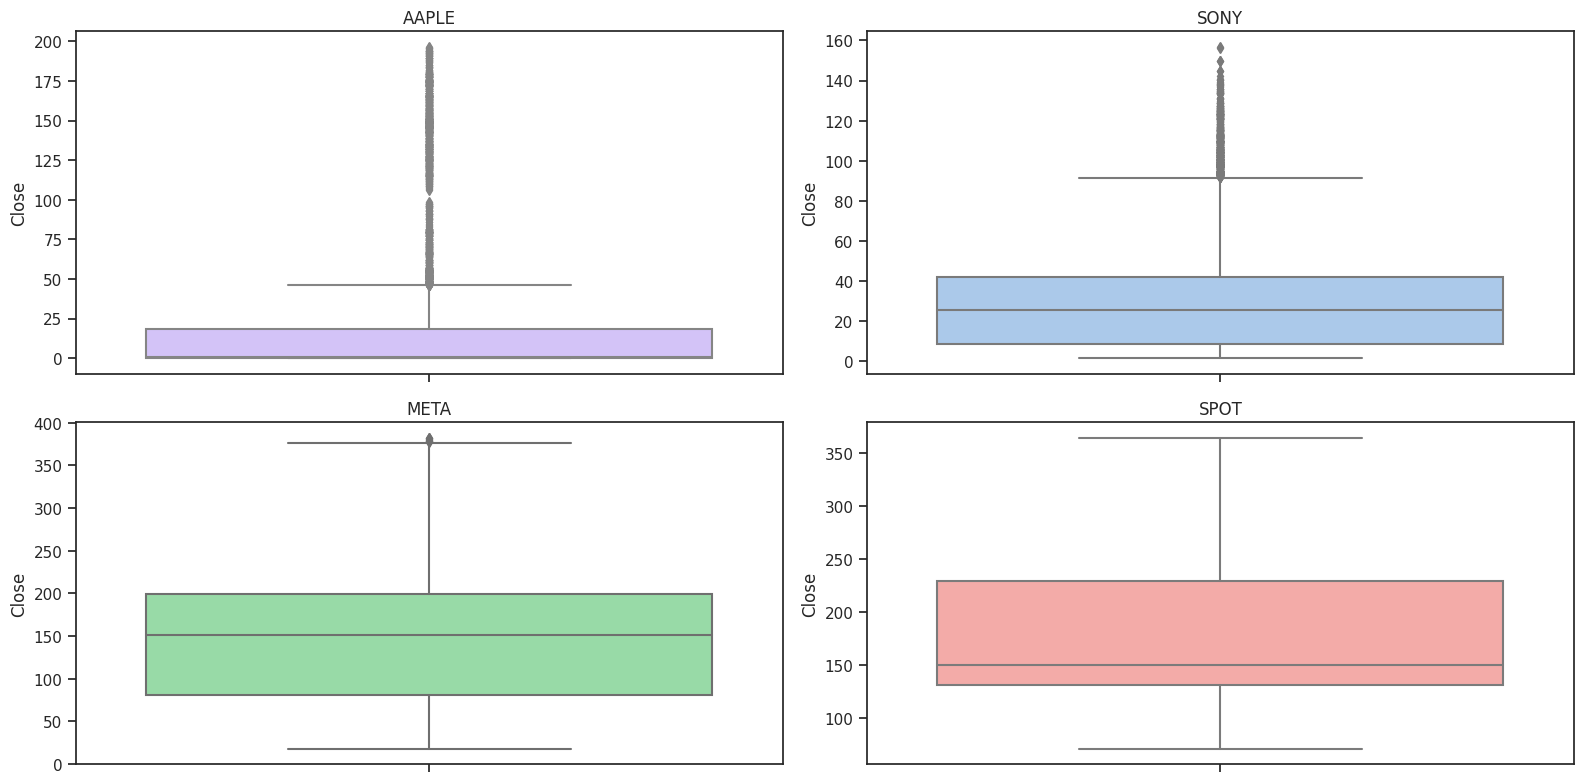

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

axes[0, 0].set_title("AAPLE")
sns.boxplot(y="Close", palette=["m"], data=aapl_df, ax=axes[0, 0])

axes[0, 1].set_title("SONY")
sns.boxplot(y="Close", palette=["b"], data=sony_df, ax=axes[0, 1])

axes[1, 0].set_title("META")
sns.boxplot(y="Close", palette=["g"], data=meta_df, ax=axes[1, 0])

axes[1, 1].set_title("SPOT")
sns.boxplot(y="Close", palette=["r"], data=spot_df, ax=axes[1, 1])

plt.tight_layout()
plt.show()

This code is also used to create the **box plot distribution** of the four subplots. This helps to explain how tightly the data is grouped, skewed and also about the symmetry of the data.

Looking at the box plot, we could see the appearance of the outliers for AAPLE is ranging from 50 to 200 at a remarkable number. Besides, the box plot of SONY shows the similar results, where the outliers distribute between 100 and 160, concentrating more to the right side.

On the other hand, the distribution of META and SPOT is different, where there are hardly any outliers appearing in the box plot, especially outside the maximum values. We can see that those outliers are possible to happen when there is unexpected events. However, to make analysis and further prepare for model training, we will ignore those outliers.



##Volume

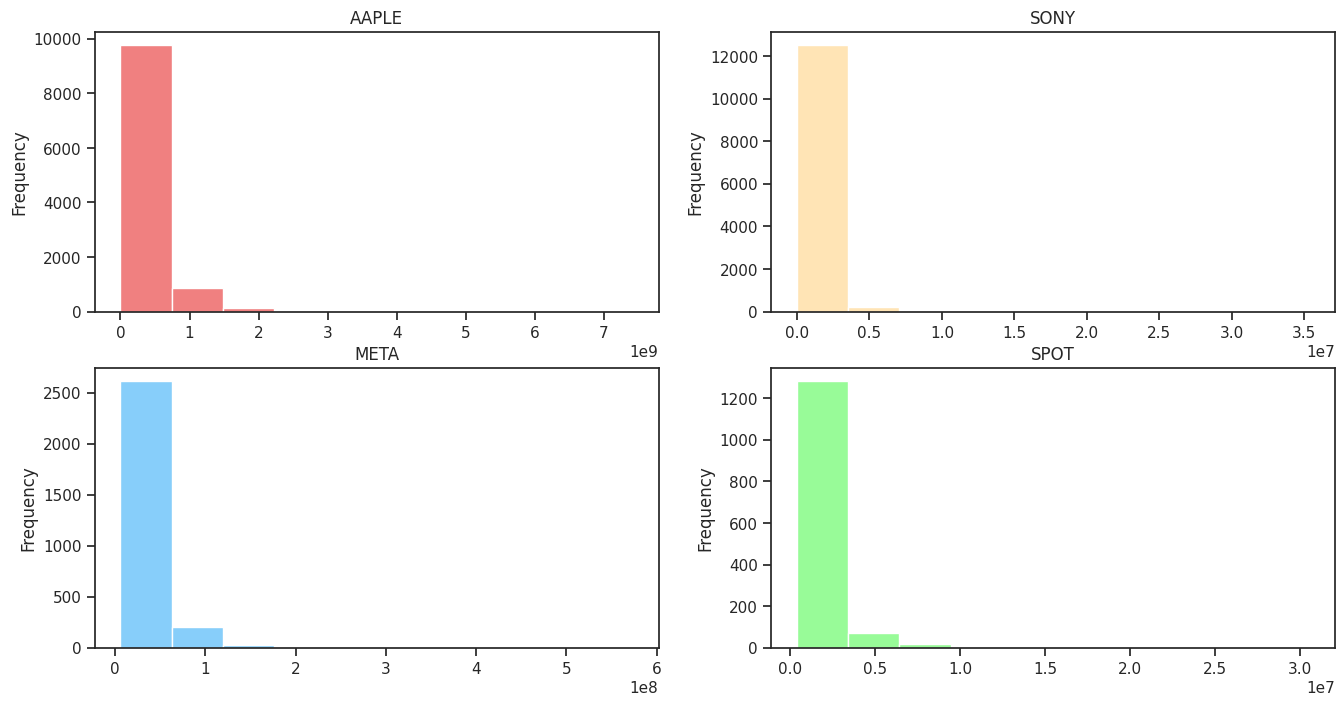

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

axes[0, 0].set_title('AAPLE')
axes[0, 0].hist(aapl_df['Volume'],color='lightcoral');

axes[0, 1].set_title('SONY')
axes[0, 1].hist(sony_df['Volume'],color='moccasin');

axes[1, 0].set_title('META')
axes[1, 0].hist(meta_df['Volume'],color='lightskyblue');

axes[1, 1].set_title('SPOT')
axes[1, 1].hist(spot_df['Volume'],color='palegreen');

for ax in axes.flatten():
    ax.set_ylabel('Frequency');

This code is written to create a figure with four subplots. Each subplot represents the **distribution of the 'Volume' of a different stock**. The x-axis represents **Volume** and the y-axis represents **Frequency**, which corresponds to the number of occurrences or observations in the histogram. The number of trading stocks concentrates at the place where the value with highest frequency is located. And there appears to be less outliers surrounding the distribution of the data points that we can clearly see.

The 4 different stocks has its Volume distributed with the density around 0 to 1. Regarding the density, that of AAPLE and SONY is around 10,000 to 12,000, which is higher compared to that of META and SPOT. However, it may be difficult to with any outliers through the histogram, therefore, we need to figure out the number and distribution point of the outliners for further analysis.

In [ ]:
def detect_outliers_zscore(data):
    threshold = 3
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    outliers = data[z_scores > threshold]
    return outliers

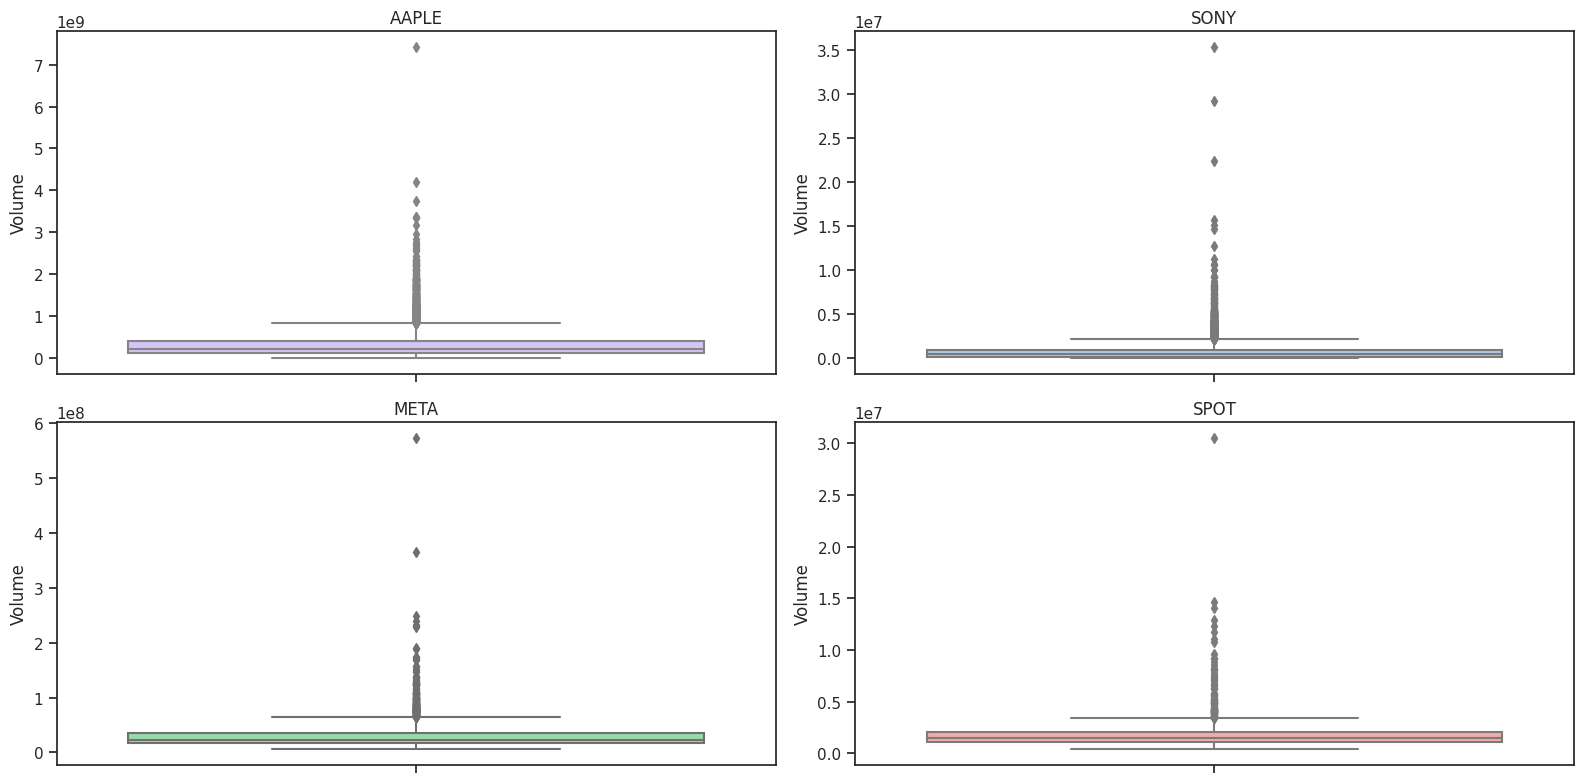

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

axes[0, 0].set_title("AAPLE")
sns.boxplot(y="Volume", palette=["m"], data=aapl_df, ax=axes[0, 0])

axes[0, 1].set_title("SONY")
sns.boxplot(y="Volume", palette=["b"], data=sony_df, ax=axes[0, 1])

axes[1, 0].set_title("META")
sns.boxplot(y="Volume", palette=["g"], data=meta_df, ax=axes[1, 0])

axes[1, 1].set_title("SPOT")
sns.boxplot(y="Volume", palette=["r"], data=spot_df, ax=axes[1, 1])

plt.tight_layout()
plt.show()

After creating the box plot of the Volume Column, we can see that there are outliers in all 4 type of stocks. We can see that Volume column is heavily impacted by outliers since some outliers are far way higher than the general dataset of each stock. Therefore, we will perform outlier removal on volume of all four stocks and closing price of AAPL's and SONY's stock.

##Outlier removal

In [ ]:
aapl_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-18,176.479996,179.380005,176.169998,177.970001,177.970001,67257600
2023-09-19,177.520004,179.630005,177.130005,179.070007,179.070007,51826900
2023-09-20,179.259995,179.699997,175.399994,175.490005,175.490005,58436200


In [ ]:
#outlier removal on CLOSE PRICE of 4 stocks
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

stock_list = ['AAPL', 'SONY', 'META', 'SPOT']

for i, stock in enumerate(stock_list):
    df = dataframes[stock]

    q1 = df.Close.quantile(0.25)
    q3 = df.Close.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    train_preprocessed = df.loc[(df.Close >= lower_bound) & (df.Close <= upper_bound)]

    ax = axes[i // 2, i % 2]
    ax.set_title(stock)
    sns.histplot(train_preprocessed.Close, kde=True, ax=ax)

    ax.annotate(f"Samples with outliers: {len(df)}", xy=(0.5, -0.4), xycoords="axes fraction", ha="center")
    ax.annotate(f"Samples without outliers: {len(train_preprocessed)}", xy=(0.5, -0.5), xycoords="axes fraction", ha="center")

plt.tight_layout()

plt.show()

The close price of all four stocks do not follow any normal distribution. Therefore, we have calculated the inner quartile range to detect outliers instead using Z-score.

The results are dependable because the number of outliers being deleted out of each stock's dataframe is in reasonable number.

We can also see that SPOT's closing price do not contain any outstanding data point, whereas META does have but also with limited number. AAPL and SONY are the two stocks having the most number of outliers in which SONY contains more than 600 outliers and AAPL contains more than 10,000 outliers. This indicates that the stock closing price may vary a lot through days.

In [ ]:
#outlier removal on VOLUME of 4 stocks
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, stock in enumerate(stock_list):
    df = dataframes[stock]

    q1 = df.Volume.quantile(0.25)
    q3 = df.Volume.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    train_preprocessed = df.loc[(df.Volume >= lower_bound) & (df.Volume <= upper_bound)]

    ax = axes[i // 2, i % 2]
    ax.set_title(stock)
    sns.histplot(train_preprocessed.Volume, kde=True, ax=ax)

    ax.annotate(f"Samples with outliers: {len(df)}", xy=(0.5, -0.4), xycoords="axes fraction", ha="center")
    ax.annotate(f"Samples without outliers: {len(train_preprocessed)}", xy=(0.5, -0.5), xycoords="axes fraction", ha="center")

plt.tight_layout()

plt.show()

The distribution is abnormal with the positive skewness. This also means that the peaks of the kernel density estimation line representing the mode of the distribution of each stocks whereas the median is more reliable than the mean. In these cases, the median is located more right-handed. Please refer to the image below for your references.

Among the four stocks, the median volume of AAPL is the highest, followed by META, SPOT and SONY.

In [ ]:
from IPython.display import Image

Image(url='https://qph.cf2.quoracdn.net/main-qimg-0182fac25e96322bc60aa90c3b34ac98')

#Daily Return

##Plotting

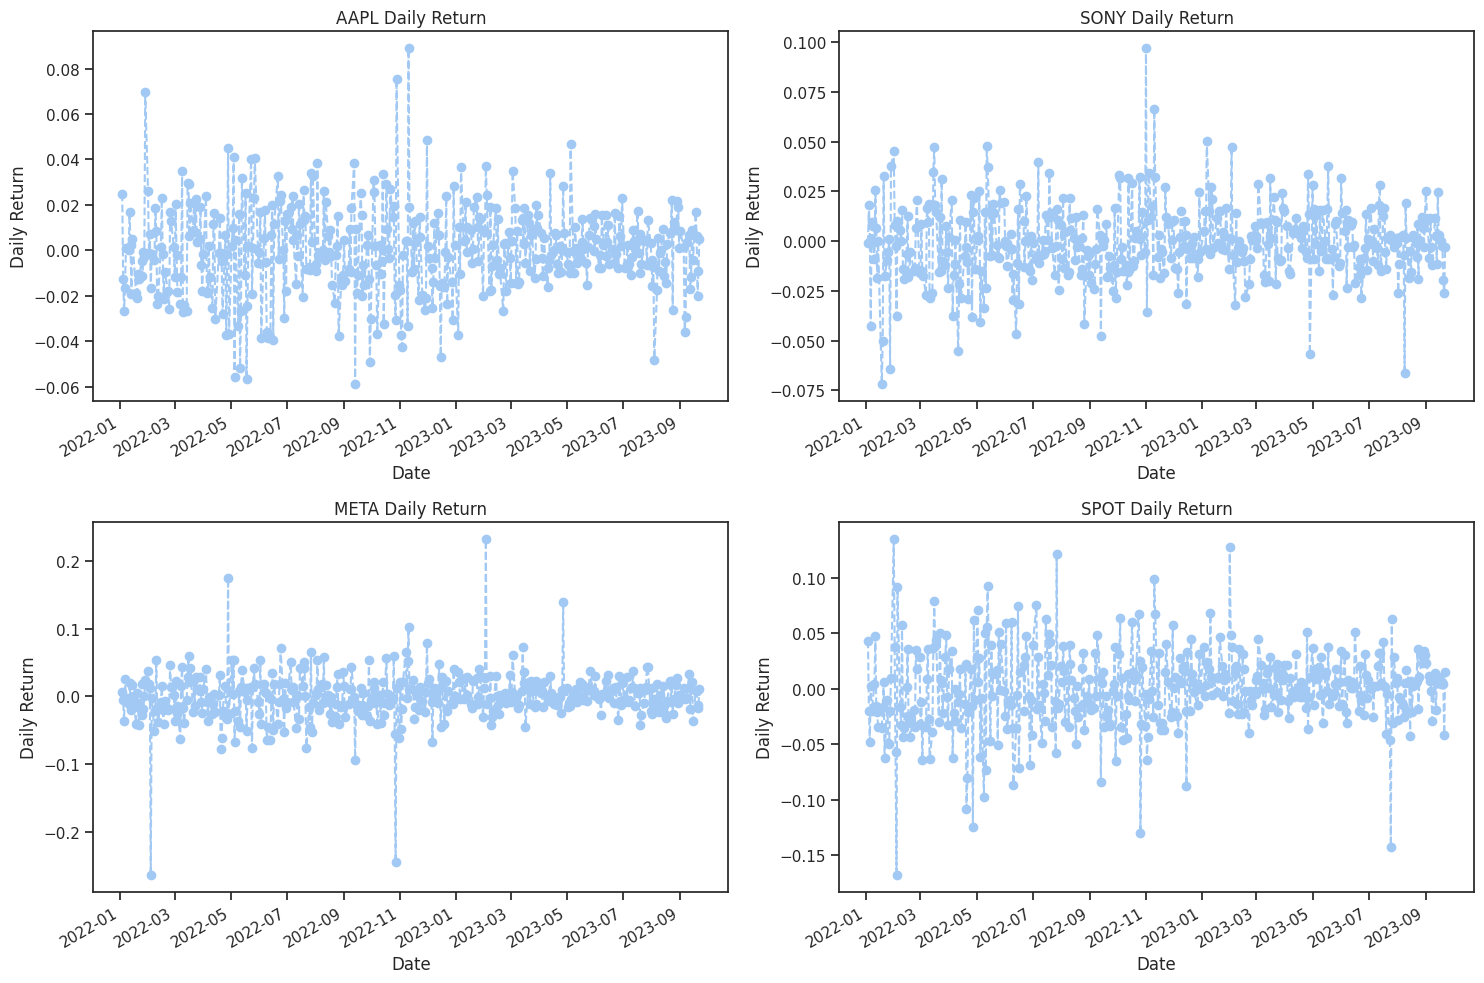

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for (i, (stock, df)) in enumerate(dataframes.items()):
    df['Daily Return'] = df['Adj Close'].pct_change()

    ax = axs[i // 2, i % 2]
    df[df.index.year >= 2022]['Daily Return'].plot(linestyle='--', marker='o', ax=ax)
    ax.set_title(f"{stock} Daily Return")
    ax.set_xlabel("Date")
    ax.set_ylabel("Daily Return")

plt.tight_layout()
plt.show()

Higher volatility is demonstrated by steeper upward or downward trends, whereas
a relatively flat line indicates lower volatility. We can see that the META's
daily returns has the least volatility meaning the short term changes in trading and investing compared to AAPL, SONY and SPOT.

Daily return on a stock is used to measure the day to day performance of stocks, it is the price of stocks at today’s closure compared to the price of the same stock at yesterday’s closure. Positive daily return means appreciation in stock price on daily comparison.

However, to make the return of stock more meaningful we will need to calculate annual return by multiplying daily return with 365 days.

##Distribution of return

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for (i, (stock, df)) in enumerate(dataframes.items()):
    # Create a histogram plot for the daily returns
    ax = axs[i // 2, i % 2]
    sns.histplot(df[df.index.year >= 2022]['Daily Return'].dropna(), bins=100, kde=True, ax=ax)
    ax.set_title(f"{stock} Daily Return")
    ax.set_xlabel("Daily Return")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

From the distribution, we can see that all four stock's daily returns follow normal distribution. However, the shape of the bell curve differs from each stocks and represents current characteristics of daily return:

1. The standard deviation stretches or squeezes the curve. A small standard deviation results in a narrow curve (such as daily return distribution of MTA), while a large standard deviation leads to a wide curve (such as daily return of AAPL, SONY and SPOT).

2. The mean determines where the peak of the curve is centered. Increasing the mean moves the curve right, while decreasing it moves the curve left:
 - the mean of all four stocks fluctuates around 0.0

In [ ]:
from IPython.display import Image

Image(url='https://www.scribbr.de/wp-content/uploads/2023/01/normal-distributions-with-different-sds.webp',width=700,height=500)

#Correlation analysis
We analyze correlation of each stock in stock_list ("AAPL", "SONY", "META", "SPOT") regarding the movement of S&P 500 index to see whether there is any relationship.

##S&P 500 index

In [ ]:
sp500 = yf.download("^GSPC", start, end)
sp500

In [ ]:
sp500.describe()

In [ ]:
#Calculate the daily returns of S&P500
sp500_returns = sp500['Adj Close'].pct_change()

##Daily return

In [ ]:
all_returns = pd.DataFrame()

for stock, df in dataframes.items():
    df['Daily Return'] = df['Close'].pct_change()
    all_returns[stock] = df['Daily Return']

all_returns['S&P 500'] = sp500_returns
corr_data = all_returns.corr(method="pearson")

In [ ]:
sns.heatmap(corr_data,annot=True,cmap="coolwarm")

The correlation can measure the movement of the stock price with that of a benchmark index, such as the S&P 500 in this case. The correlation coefficient ranges from -1 to 1. A value of 1 represents a perfect positive correlation, meaning that when one variable increases, the other variable also increases in a consistent manner.

For example, the correlation coefficient of 0.83 between AAPL and S&P 500 suggests a strong positive relationship, indicating that when S&P 500's index increases, there is a high likelihood that AAPL stock will also tend to grow higher. This is also the highest level of correlation in the table.

On the other hand, the correlation coefficient between 005930.KS and META is 0.015. It shows that the price movements of 005930.KS and META are not remarkably associated with each other.

However, changes in one variable do not certainly predict changes in the other. While there may be a highly positive correlation between AAPL and the S&P 500, it does not accordingly mean that one price directly causes the other. The movements of both variables can be impacted by other factors from the market.

In [ ]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [ ]:
returns_fig = sns.PairGrid(all_returns.dropna())
returns_fig.map_upper(plt.scatter,color='c')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30,color='seagreen')

##Volume

In [ ]:
all_volume = pd.DataFrame()

for stock, df in dataframes.items():
    all_volume[stock] = df['Volume']

all_volume['S&P 500'] = sp500['Volume']
corr_volume = all_volume.corr(method="pearson")

In [ ]:
sns.heatmap(corr_volume,annot=True,cmap ="coolwarm")

The correlation can measure the movement of the stock volume with that of a benchmark index, such as the S&P 500 in this case. The correlation coefficient ranges from -1 to 1. A value of 1 represents a perfect positive correlation, meaning that when one variable increases, the other variable also increases in a consistent manner.

In terms of stock volume, the correlation coefficient of 0.45 between AAPL and S&P 500 is also the highest figure in the table, which shows a strong positive relationship. There is a tendency indicates that when S&P 500's index increases, AAPL stock will also increase.

To the contary, the lowest correlation coefficient is 0.071, which is between SPOT and SONY. This means that the fluctuations in the stock volume of SPOT will  exert low impact on that of SONY. certainly predict changes in the other.

Moreover, the movements of both variables can be influenced by other factors from the market, so strong positive correlation coefficient does not accordingly mean that one volume directly causes the other.

In [ ]:
returns_fig = sns.PairGrid(all_volume.dropna())
returns_fig.map_upper(plt.scatter,color='c')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30,color='g')